<a href="https://colab.research.google.com/github/TheBoy-WhoCode/A_Guide_to_Running_Tensorflow_Models_on_Android/blob/master/EDA_on_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

plt.rcParams['figure.figsize'] = 10, 12

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Part 1**

## **Indian Data Analysis**

In [0]:
!unzip /content/covid_india.zip

In [0]:
indian_data = pd.read_csv("/content/covid_19_india.csv")
indian_data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [0]:
indian_coord = pd.read_csv("/content/Indian_coord.csv")
indian_coord.head()

,State/UnionTerritory,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [0]:
indian_data.drop(['Sno'], axis=1, inplace=True)

In [0]:
indian_data.tail()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1119,19/04/20,5:00 PM,Telengana,-,-,186,18,844
1120,19/04/20,5:00 PM,Tripura,-,-,1,0,2
1121,19/04/20,5:00 PM,Uttarakhand,-,-,9,0,42
1122,19/04/20,5:00 PM,Uttar Pradesh,-,-,108,17,1084
1123,19/04/20,5:00 PM,West Bengal,-,-,62,12,310


In [0]:
indian_data.columns

Index(['Date', 'Time', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed'],
      dtype='object')

In [0]:
indian_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      1124 non-null   object
 1   Time                      1124 non-null   object
 2   State/UnionTerritory      1124 non-null   object
 3   ConfirmedIndianNational   1124 non-null   object
 4   ConfirmedForeignNational  1124 non-null   object
 5   Cured                     1124 non-null   int64 
 6   Deaths                    1124 non-null   int64 
 7   Confirmed                 1124 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 70.4+ KB


In [0]:
total_cases = indian_data['Confirmed'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (19th April, 2020):', total_cases)

Total number of confirmed COVID 2019 cases across India till date (19th April, 2020): 155422


In [0]:
indian_data.style.background_gradient(cmap='Reds')

**Visulization inference:**
*   First case in Kerla dated 30/01/2020 6.00pm
*   Highly affected state - Maharashtra
*   First Death reported in Karnataka dated 13/03/20 6:00 PM
*   Total 155422 Confirmed cases in India till date 19th April 2020 







In [0]:
#Total active cases
indian_data['Total Active'] = indian_data['Confirmed'] - (indian_data['Deaths'] + indian_data['Cured'])
total_active = indian_data['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = indian_data.groupby('State/UnionTerritory')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 134317


,Total Active
State/UnionTerritory,
Maharashtra,27133
Delhi,17416
Tamil Nadu,14506
Rajasthan,10515
Madhya Pradesh,9369
Uttar Pradesh,8697
Gujarat,8020
Telengana,7775
Andhra Pradesh,6451


 **Visualization inference:**
*   Maharashtra, Delhi, & Tamil nadu are currently TOP 3 states with maximum number of Active Cases
*  Nagaland has minimum number of cases





In [0]:
df_full = pd.merge(indian_coord, indian_data, on='State/UnionTerritory')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



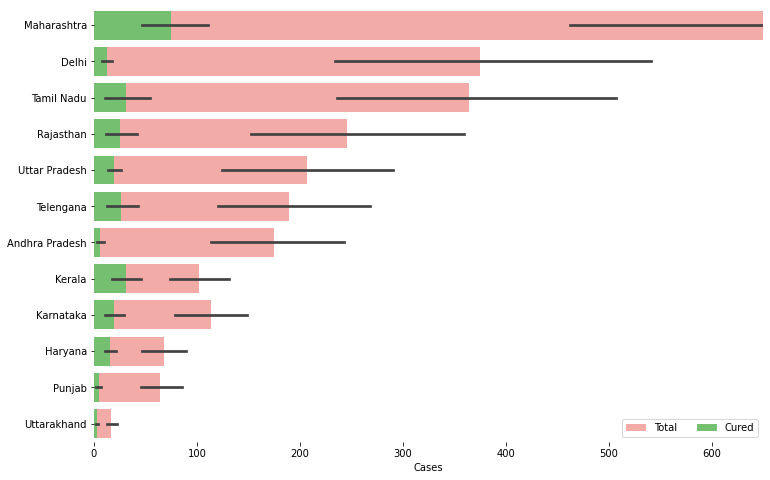

In [0]:
#Confirmed VS Recovered Figures
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['State/UnionTerritory', 'Confirmed', 'Cured', 'Deaths']]
data.sort_values('Confirmed', ascending=False, inplace=True)
sns.set_color_codes('pastel')
sns.barplot(x='Confirmed', y='State/UnionTerritory', data=data, label='Total', color='r')

sns.set_color_codes('muted')
sns.barplot(x='Cured', y='State/UnionTerritory', data=data, label='Cured', color='g' )

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 650), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [0]:
import plotly
plotly.io.renderers.default = 'colab'

In [0]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=indian_data['Date'], y=indian_data['Confirmed'], mode='lines+markers', name='Total Cases'))
fig.update_layout(title_text="Trend of COVID19 Cases in India", plot_bgcolor='rgb(230, 230, 230)')
fig.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

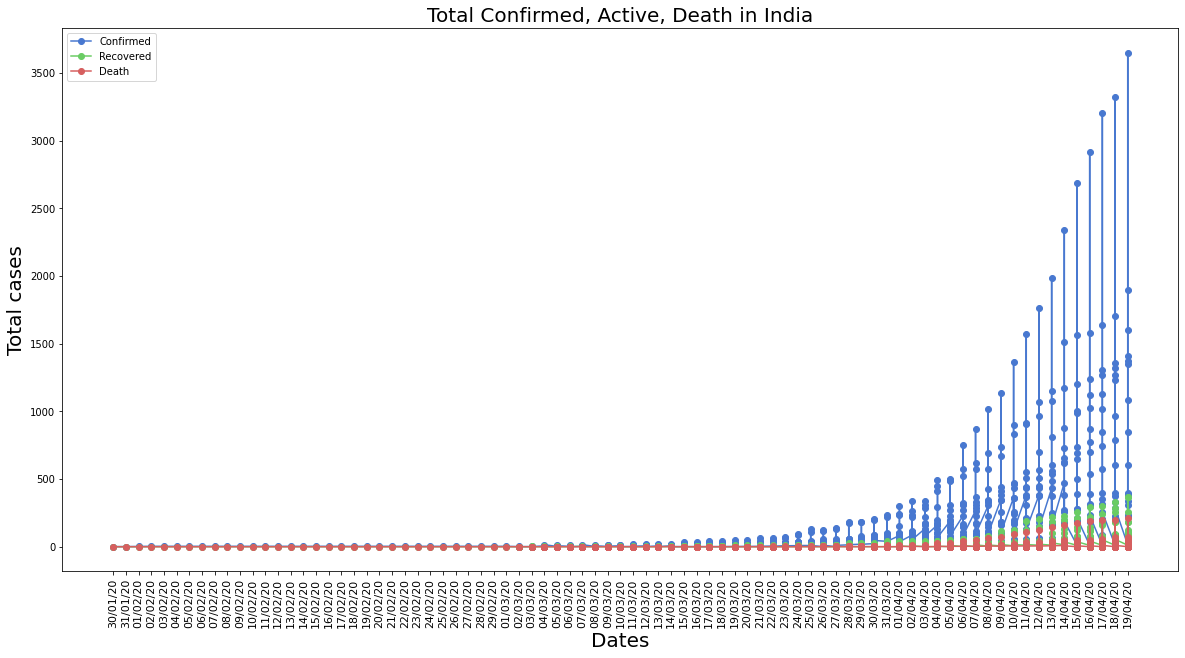

In [0]:
confirmed_cases = indian_data['Confirmed']
death_cases = indian_data['Deaths']
cured_cases = indian_data['Cured']

plt.figure(figsize= (20,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(y=confirmed_cases, x=indian_data['Date'], label = 'Confirmed',linestyle ='solid',color = 'b')
ax2 = plt.plot_date(y=cured_cases, x= indian_data['Date'], label = 'Recovered',linestyle ='solid',color = 'g')
ax3 = plt.plot_date(y=death_cases, x= indian_data['Date'], label = 'Death',linestyle ='solid',color = 'r')
plt.legend()


,Cured,Deaths,Confirmed,Total Active
Cured,1.000000,0.687962,0.798914,0.748080
Deaths,0.687962,1.000000,0.859747,0.841638
Confirmed,0.798914,0.859747,1.000000,0.996392
Total Active,0.748080,0.841638,0.996392,1.000000


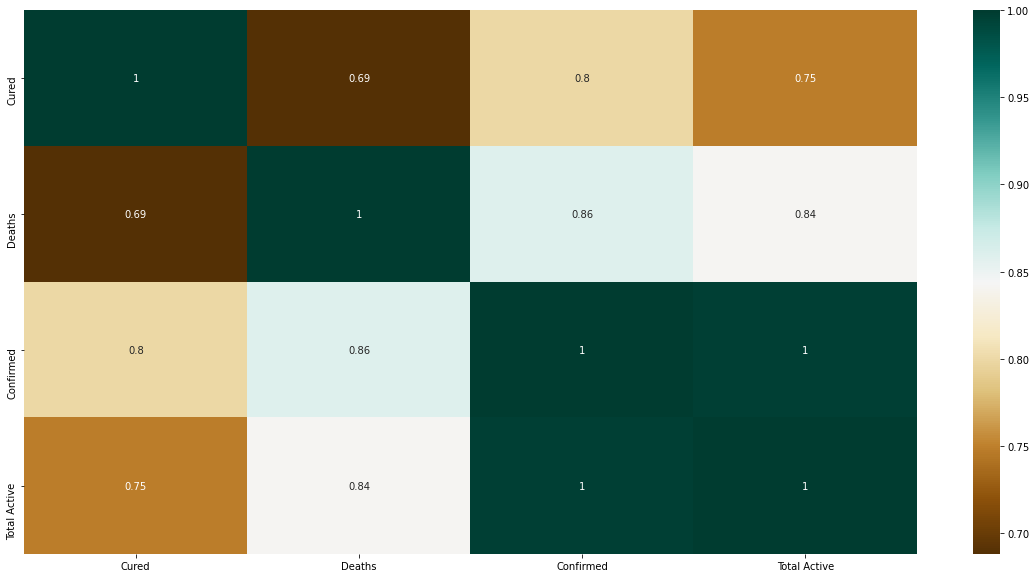

In [0]:
plt.figure(figsize=(20,10))
c= indian_data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [0]:
import IPython
IPython.display.HTML('<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/1977187" data-url="https://flo.uri.sh/visualisation/1977187/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>')

## Age Analysis

In [0]:
age_df = pd.read_csv('/content/AgeGroupDetails.csv')

In [0]:
age_df.columns

Index(['Sno', 'AgeGroup', 'TotalCases', 'Percentage'], dtype='object')

In [0]:
age_df.drop(['Sno'], axis=1, inplace=True)

In [0]:
age_df

,AgeGroup,TotalCases,Percentage
0,0-9,22,3.18%
1,10-19,27,3.90%
2,20-29,172,24.86%
3,30-39,146,21.10%
4,40-49,112,16.18%
5,50-59,77,11.13%
6,60-69,89,12.86%
7,70-79,28,4.05%
8,>=80,10,1.45%
9,Missing,9,1.30%


In [0]:
import plotly.express as px

fig = px.pie(age_df, values='TotalCases', names='AgeGroup',title='Confirmed cases of India')
fig.show()

## Hospital Beds analysis

In [0]:
hos_beds_df = pd.read_csv("/content/HospitalBedsIndia.csv")

In [0]:
hos_beds_df.drop(['Sno'], axis=1, inplace=True)

In [0]:
hos_beds_df.tail()

,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
32,Tripura,114,22,12.0,9,157,4895,99,1140,56,3277
33,Uttar Pradesh,3277,671,NaN,174,4122,58310,4442,39104,193,37156
34,Uttarakhand,275,69,19.0,20,383,6660,410,3284,50,5228
35,West Bengal,1374,406,70.0,55,1905,51163,1272,19684,294,58882
36,All India,"29,899",5568,1255.0,1003,37725,739024,19810,279588,3772,431173


## Inidividual Details Analysis

In [0]:
individual_det_df = pd.read_csv("/content/IndividualDetails.csv")

In [0]:
individual_det_df

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."
...,...,...,...,...,...,...,...,...,...,...,...
13659,13660,KA-P349,17/04/2020,NaN,NaN,NaN,Bengaluru,Karnataka,NaN,17/04/2020,NaN
13660,13661,KA-P350,17/04/2020,NaN,NaN,NaN,Bengaluru,Karnataka,NaN,17/04/2020,NaN
13661,13662,KA-P351,17/04/2020,NaN,NaN,NaN,Bengaluru,Karnataka,NaN,17/04/2020,NaN
13662,13663,KA-P352,17/04/2020,NaN,NaN,NaN,Bengaluru,Karnataka,NaN,17/04/2020,NaN


In [0]:
individual_det_df.columns

Index(['id', 'government_id', 'diagnosed_date', 'age', 'gender',
       'detected_city', 'detected_district', 'detected_state', 'nationality',
       'status_change_date', 'notes'],
      dtype='object')

In [0]:
individual_det_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664 entries, 0 to 13663
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  13664 non-null  int64 
 1   government_id       2208 non-null   object
 2   diagnosed_date      13664 non-null  object
 3   age                 1563 non-null   object
 4   gender              2611 non-null   object
 5   detected_city       1667 non-null   object
 6   detected_district   11557 non-null  object
 7   detected_state      13664 non-null  object
 8   nationality         1297 non-null   object
 9   status_change_date  13553 non-null  object
 10  notes               12299 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


In [0]:
individual_det_df.head()

,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,status_change_date,notes
0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,14/02/2020,Travelled from Wuhan
1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,14/02/2020,Travelled from Wuhan
2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,14/02/2020,Travelled from Wuhan
3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,15/03/2020,"Travelled from Austria, Italy"
4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


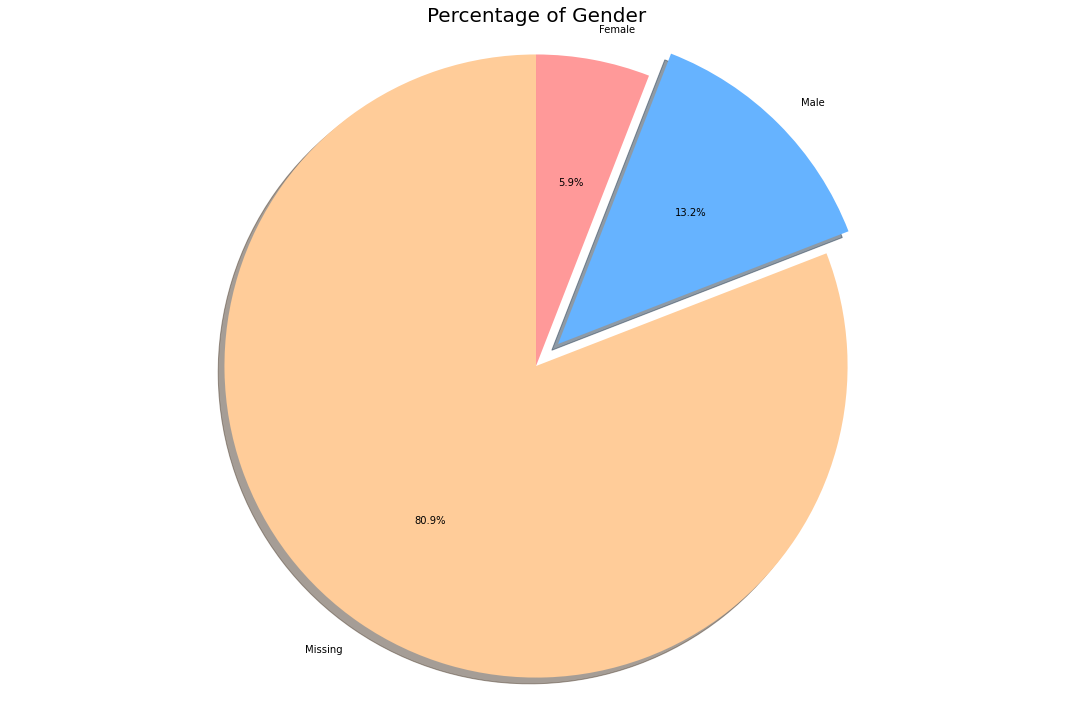

In [0]:
labels = ["Missing", "Male", "Female"]
sizes = []
sizes.append(individual_det_df['gender'].isnull().sum())
sizes.append(list(individual_det_df['gender'].value_counts())[0])
sizes.append(list(individual_det_df['gender'].value_counts())[1])

explode = (0, 0.1, 0)
colors = ['#ffcc99','#66b3ff','#ff9999']

plt.figure(figsize= (15,10))
plt.title('Percentage of Gender',fontsize = 20)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.tight_layout()

## Population Analysis

In [0]:
population_df = pd.read_csv("/content/population_india_census2011.csv")

In [0]:
population_df

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931
5,6,Tamil Nadu,72147030,37229590,34917440,"130,058 km2 (50,216 sq mi)","555/km2 (1,440/sq mi)",996
6,7,Rajasthan,68548437,51500352,17048085,"342,239 km2 (132,139 sq mi)",201/km2 (520/sq mi),928
7,8,Karnataka,61095297,37469335,23625962,"191,791 km2 (74,051 sq mi)",319/km2 (830/sq mi),973
8,9,Gujarat,60439692,34694609,25745083,"196,024 km2 (75,685 sq mi)",308/km2 (800/sq mi),919
9,10,Andhra Pradesh,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993


## Testing Details Analysis

In [0]:
test_det_df = pd.read_csv("/content/ICMRTestingDetails.csv")

In [0]:
test_det_df

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Source
0,1,13/03/20 18:00,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf
1,2,18/03/20 18:00,13125.0,12235.0,150.0,ICMR_website_update_18March_6PM_IST.pdf
2,3,19/03/20 18:00,14175.0,13285.0,182.0,ICMR_website_update_19March_6PM_IST.pdf
3,4,20/03/20 18:00,15404.0,14514.0,236.0,ICMR_website_update_20March_6PM_IST.pdf
4,5,21/03/20 18:00,16911.0,16021.0,315.0,ICMR_website_update_21March_6PM_IST.pdf
5,6,22/03/20 18:00,18127.0,17237.0,396.0,ICMR_website_update_22March_6PM_IST.pdf
6,7,23/03/20 20:00,20707.0,19817.0,471.0,ICMR_website_update_23March_8PM_IST.pdf
7,8,24/03/20 20:00,22694.0,21804.0,536.0,ICMR_website_update_24March_8PM_IST.pdf
8,9,25/03/20 20:00,25144.0,24254.0,581.0,ICMR_website_update_25March_8PM_IST.pdf
9,10,26/03/20 20:00,NaN,NaN,NaN,NaN


## Testing labs Analysis

In [0]:
test_labs_df = pd.read_csv("/content/ICMRTestingDetails.csv")

In [0]:
test_labs_df

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Source
0,1,13/03/20 18:00,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf
1,2,18/03/20 18:00,13125.0,12235.0,150.0,ICMR_website_update_18March_6PM_IST.pdf
2,3,19/03/20 18:00,14175.0,13285.0,182.0,ICMR_website_update_19March_6PM_IST.pdf
3,4,20/03/20 18:00,15404.0,14514.0,236.0,ICMR_website_update_20March_6PM_IST.pdf
4,5,21/03/20 18:00,16911.0,16021.0,315.0,ICMR_website_update_21March_6PM_IST.pdf
5,6,22/03/20 18:00,18127.0,17237.0,396.0,ICMR_website_update_22March_6PM_IST.pdf
6,7,23/03/20 20:00,20707.0,19817.0,471.0,ICMR_website_update_23March_8PM_IST.pdf
7,8,24/03/20 20:00,22694.0,21804.0,536.0,ICMR_website_update_24March_8PM_IST.pdf
8,9,25/03/20 20:00,25144.0,24254.0,581.0,ICMR_website_update_25March_8PM_IST.pdf
9,10,26/03/20 20:00,NaN,NaN,NaN,NaN


## State Wise Test Analysis

In [0]:
state_wise_test_df = pd.read_csv("/content/StatewiseTestingDetails.csv")

In [0]:
state_wise_test_df

,Date,State,TotalSamples,Negative,Positive
0,2020-02-17,Kerala,423,406.0,3
1,2020-02-18,Kerala,425,420.0,3
2,2020-02-19,Kerala,432,423.0,3
3,2020-02-20,Kerala,433,423.0,3
4,2020-02-21,Kerala,437,426.0,3
...,...,...,...,...,...
196,2020-04-10,Odisha,3249,3201.0,48
197,2020-04-10,Punjab,3461,2972.0,151
198,2020-04-10,Rajasthan,22324,20673.0,520
199,2020-04-10,Tamil Nadu,8410,6838.0,911


In [0]:
testing=state_wise_test_df.groupby('State').sum().reset_index()
fig = px.bar(testing, 
             x="TotalSamples",
             y="State", 
             orientation='h',
             height=800,
             title='Testing statewise insight')
fig.show()

# **Models**

# Sigmoid Model

In [0]:
df = indian_data.groupby('Date')['Confirmed', 'Deaths'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [0]:
df['day_count'] = list(range(1, len(df)+1))
df

,Confirmed,Deaths,day_count
Date,,,
01/02/20,2,0,1
01/03/20,3,0,2
01/04/20,1834,41,3
02/02/20,3,0,4
02/03/20,5,0,5
...,...,...,...
29/03/20,1024,27,77
30/01/20,1,0,78
30/03/20,1251,31,79


In [0]:
y = df.Confirmed
x = df.day_count

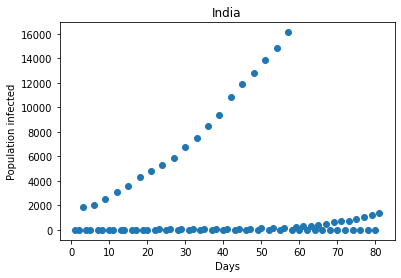

In [0]:
df['rate'] = (df.Confirmed - df.Confirmed.shift(1))/df.Confirmed
df['increase'] = (df.Confirmed - df.Confirmed.shift(1))

plt.plot(x, y, 'o')
plt.title("India")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()

In [0]:
df

,Confirmed,Deaths,day_count,rate,increase
Date,,,,,
01/02/20,2,0,1,NaN,NaN
01/03/20,3,0,2,0.333333,1.0
01/04/20,1834,41,3,0.998364,1831.0
02/02/20,3,0,4,-610.333333,-1831.0
02/03/20,5,0,5,0.400000,2.0
...,...,...,...,...,...
29/03/20,1024,27,77,0.997070,1021.0
30/01/20,1,0,78,-1023.000000,-1023.0
30/03/20,1251,31,79,0.999201,1250.0


In [0]:
from scipy.optimize import curve_fit
import pylab
from datetime import timedelta

In [0]:
df = df[df.Confirmed >= 100]

In [0]:
def sigmoid(x,c,a,b):
     y = c*1 / (1 + np.exp(-a*(x-b)))
     return y

xdata = np.array(list(df.day_count)[::2])
ydata = np.array(list(df.Confirmed)[::2])

population=1.332*10**9
popt, pcov = curve_fit(sigmoid, xdata, ydata, method='dogbox',bounds=([0.,0., 0.],[population,6, 100.]))
print(popt)

[4459.33331444    0.           50.34512601]


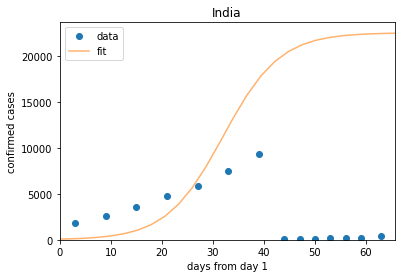

IndexError: ignored

In [0]:
est_a = 22500
est_b = 0.18
est_c = 32
x = np.linspace(-1, df.day_count.max()+50, 50)
y = sigmoid(x,est_a,est_b,est_c)
pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x, y, label='fit',alpha = 0.6)
pylab.ylim(-0.05, est_a*1.05)
pylab.xlim(-0.05, est_c*2.05)
pylab.legend(loc='best')
plt.xlabel('days from day 1')
plt.ylabel('confirmed cases')
plt.title('India')
pylab.show()


print('model start date:',df[df.day_count==1].index[0])
print('model start infection:',int(df[df.day_count==1].Confirmed[0]))
print('model fitted max infection at:',int(est_a))
print('model sigmoidal coefficient is:',round(est_b,3))
print('model curve stop steepening, start flattening by day:',int(est_c))
print('model curve flattens by day:',int(est_c)*2)
display(df.head(3))
display(df.tail(3))

# **Part 2**
# **World Wide Data Analysis**

In [0]:
!unzip /content/novel-corona-virus-2019-dataset.zip

In [0]:
world_wide_data = pd.read_csv("/content/covid_19_data.csv")
world_wide_data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
16724,16725,04/19/2020,Wyoming,US,2020-04-19 23:49:05,313.0,2.0,0.0
16725,16726,04/19/2020,Xinjiang,Mainland China,2020-04-19 23:49:05,76.0,3.0,73.0
16726,16727,04/19/2020,Yukon,Canada,2020-04-19 23:49:05,9.0,0.0,0.0
16727,16728,04/19/2020,Yunnan,Mainland China,2020-04-19 23:49:05,184.0,2.0,178.0


In [0]:
world_wide_data.drop(['SNo'], axis=1, inplace=True)

In [0]:
world_wide_data.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


# **Part 3**
Prediction

In [0]:
from fbprophet import Prophet

In [0]:
confirmed = indian_data.groupby('Date').sum()['Confirmed'].reset_index()
deaths = indian_data.groupby('Date').sum()['Deaths'].reset_index()
recovered = indian_data.groupby('Date').sum()['Cured'].reset_index()

In [0]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [0]:
confirmed.tail()

,ds,y
76,2020-03-29,1024
77,2020-01-30,1
78,2020-03-30,1251
79,2020-01-31,1
80,2020-03-31,1397


In [0]:
model = Prophet(interval_width=0.95)
model.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = model.make_future_dataframe(periods=1)
future.tail()

,ds
77,2020-11-04
78,2020-12-02
79,2020-12-03
80,2020-12-04
81,2020-12-05


In [0]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
77,2020-11-04,3551.677625,-3717.265214,11704.594095
78,2020-12-02,3771.442765,-3655.396458,11259.597035
79,2020-12-03,3164.348063,-4157.903281,10416.762075
80,2020-12-04,3816.482721,-3229.689338,11045.118315
81,2020-12-05,4042.809264,-3866.679107,11438.240200


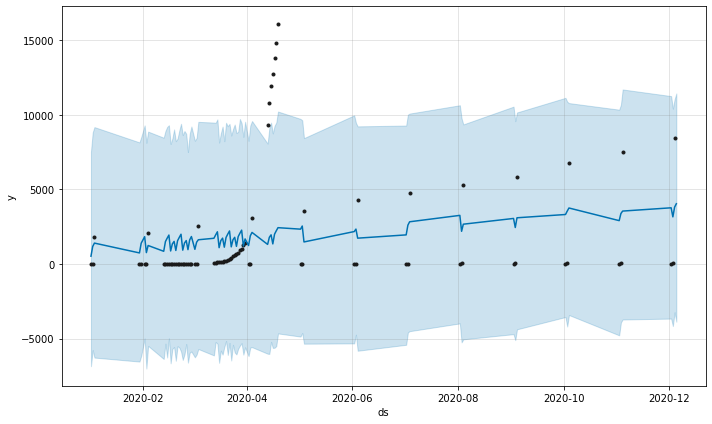

In [0]:
confirmed_forecast_plot = model.plot(forecast)

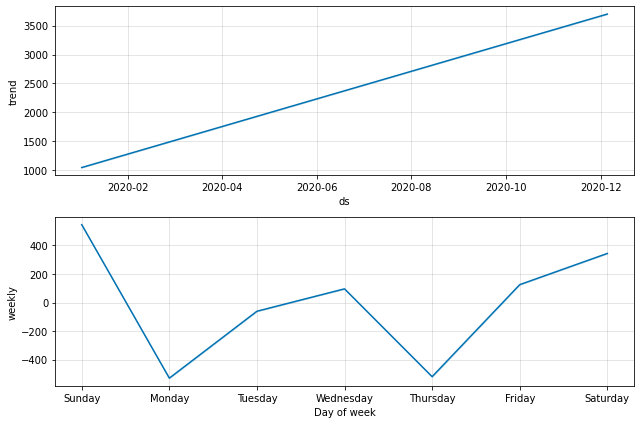

In [0]:
confirmed_forecast_plot =model.plot_components(forecast)